# Classifying Tumors as Cancerous or Benign

By: Matt Purvis

This project will take in tumor data and train a model based off the labeled targets as benign or cancerous using a keras neural network. 

In [1]:
import pandas as pd
import numpy as no
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
from sklearn.metrics import classification_report,confusion_matrix
sns.set()

# Read in the Data


In [4]:
df = pd.read_csv('C:\\Users\\v-mpurvis\\OneDrive\\Personal Files\\Python Machine Learning Examples\\TensorFlow_FILES\\DATA\\cancer_classification.csv')
df.iloc[:10, :15]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,0.3063,1.0020,2.406,24.32,0.005731
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149


In [5]:
df.iloc[:10, 15:]

,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
5,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0
6,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
7,0.03029,0.02488,0.01448,0.01486,0.005412,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0
8,0.03502,0.03553,0.01226,0.02143,0.003749,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0
9,0.07217,0.07743,0.01432,0.01789,0.010080,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0


In [7]:
# Check for null values

df.describe().transpose() # No missing values which is good

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


# Exploratory Analysis

<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

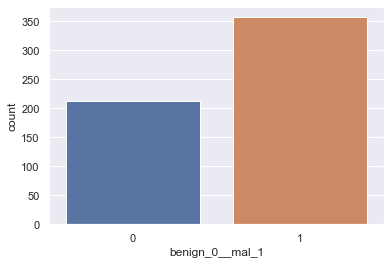

In [11]:
 # Graph number of begin vs malignant tumors

sns.countplot(x='benign_0__mal_1', data = df) 

In [12]:
# Look at correlations of the features with the target variable benign or malignant

df.corr()['benign_0__mal_1'][:-1].sort_values(ascending=False)


smoothness error           0.067016
mean fractal dimension     0.012838
texture error              0.008303
symmetry error             0.006522
fractal dimension error   -0.077972
concavity error           -0.253730
compactness error         -0.292999
worst fractal dimension   -0.323872
mean symmetry             -0.330499
mean smoothness           -0.358560
concave points error      -0.408042
mean texture              -0.415185
worst symmetry            -0.416294
worst smoothness          -0.421465
worst texture             -0.456903
area error                -0.548236
perimeter error           -0.556141
radius error              -0.567134
worst compactness         -0.590998
mean compactness          -0.596534
worst concavity           -0.659610
mean concavity            -0.696360
mean area                 -0.708984
mean radius               -0.730029
worst area                -0.733825
mean perimeter            -0.742636
worst radius              -0.776454
mean concave points       -0

(array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

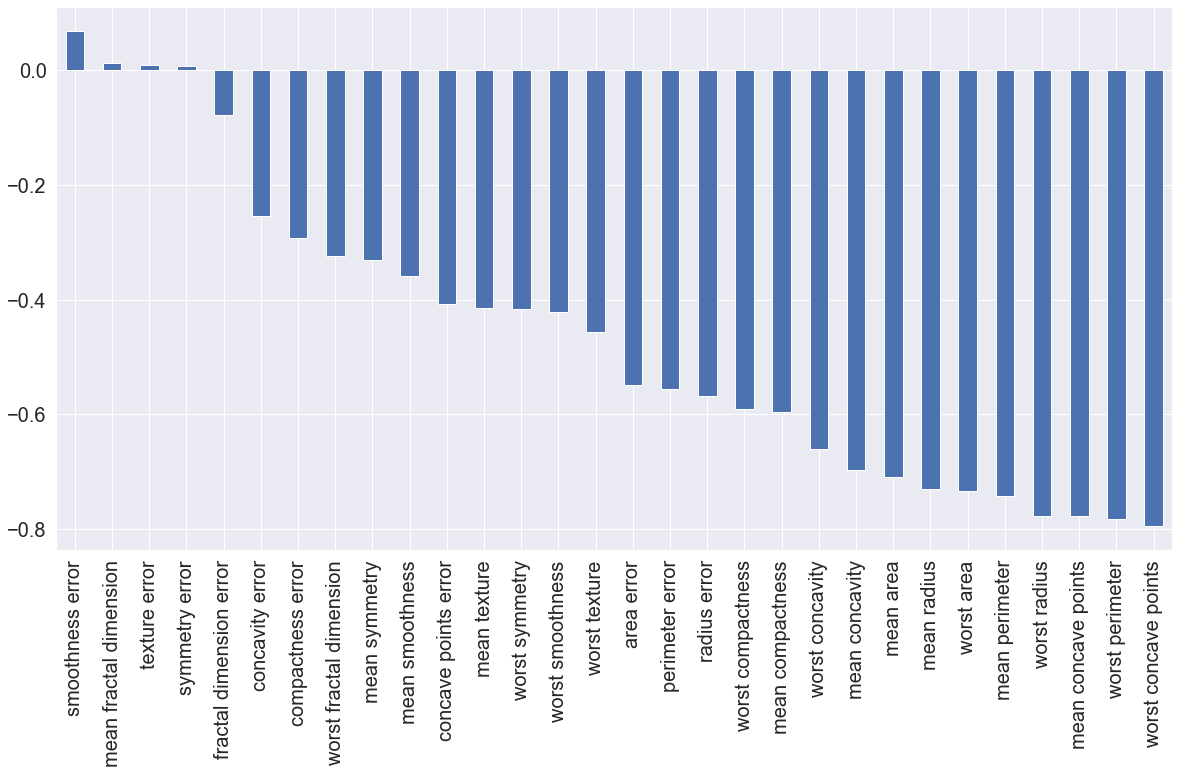

In [21]:
# Plot Correlations 

df.corr()['benign_0__mal_1'][:-1].sort_values(ascending=False).plot(kind = 'bar', figsize = [20,10])
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

# Train_Test_Split

In [24]:
X = df.drop('benign_0__mal_1', axis=1).values
y = df['benign_0__mal_1'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =52) # Split into train_test

# Scale the Data

In [25]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the model

In [27]:
model = Sequential()
#choosing size of layers
X_train.shape 
#there are 30 features, so we will have 31 neurons ( 1 for each feature and an error term)
#early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience = 25)
model.add(Dense(31,activation = 'relu'))
#droput layers to prevent overfitting and to turn off neurons
model.add(Dropout(0.5)) #turns off half
model.add(Dense(15,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid')) # Single neuron & sigmoid transformation for benign or malignant
model.compile(optimizer='adam', loss='binary_crossentropy') # Using crossentropy and adam to minimize cost function
model.fit(x=X_train, y=y_train
          ,validation_data = (X_test, y_test)
          ,epochs=600 # max epochs
          , verbose=1
          ,callbacks = [early_stop] ) # Implement early stopping to prevent overfitting

Epoch 1/600
13/13 [==============================] - 0s 17ms/step - loss: 0.7217 - val_loss: 0.6687
Epoch 2/600
13/13 [==============================] - 0s 2ms/step - loss: 0.6914 - val_loss: 0.6487
Epoch 3/600
13/13 [==============================] - 0s 2ms/step - loss: 0.6690 - val_loss: 0.6295
Epoch 4/600
13/13 [==============================] - 0s 2ms/step - loss: 0.6442 - val_loss: 0.6091
Epoch 5/600
13/13 [==============================] - 0s 2ms/step - loss: 0.6328 - val_loss: 0.5855
Epoch 6/600
13/13 [==============================] - 0s 2ms/step - loss: 0.6112 - val_loss: 0.5611
Epoch 7/600
13/13 [==============================] - 0s 2ms/step - loss: 0.5893 - val_loss: 0.5325
Epoch 8/600
13/13 [==============================] - 0s 2ms/step - loss: 0.5757 - val_loss: 0.5015
Epoch 9/600
13/13 [==============================] - 0s 2ms/step - loss: 0.5536 - val_loss: 0.4724
Epoch 10/600
13/13 [==============================] - 0s 2ms/step - loss: 0.5425 - val_loss: 0.4388
Epoch 11

Epoch 83/600
13/13 [==============================] - 0s 2ms/step - loss: 0.1399 - val_loss: 0.0697
Epoch 84/600
13/13 [==============================] - 0s 2ms/step - loss: 0.1210 - val_loss: 0.0667
Epoch 85/600
13/13 [==============================] - 0s 2ms/step - loss: 0.1253 - val_loss: 0.0660
Epoch 86/600
13/13 [==============================] - 0s 2ms/step - loss: 0.1273 - val_loss: 0.0661
Epoch 87/600
13/13 [==============================] - 0s 2ms/step - loss: 0.0974 - val_loss: 0.0667
Epoch 88/600
13/13 [==============================] - 0s 2ms/step - loss: 0.1354 - val_loss: 0.0651
Epoch 89/600
13/13 [==============================] - 0s 2ms/step - loss: 0.1104 - val_loss: 0.0626
Epoch 90/600
13/13 [==============================] - 0s 2ms/step - loss: 0.1458 - val_loss: 0.0642
Epoch 91/600
13/13 [==============================] - 0s 2ms/step - loss: 0.1295 - val_loss: 0.0636
Epoch 92/600
13/13 [==============================] - 0s 2ms/step - loss: 0.1418 - val_loss: 0.0671


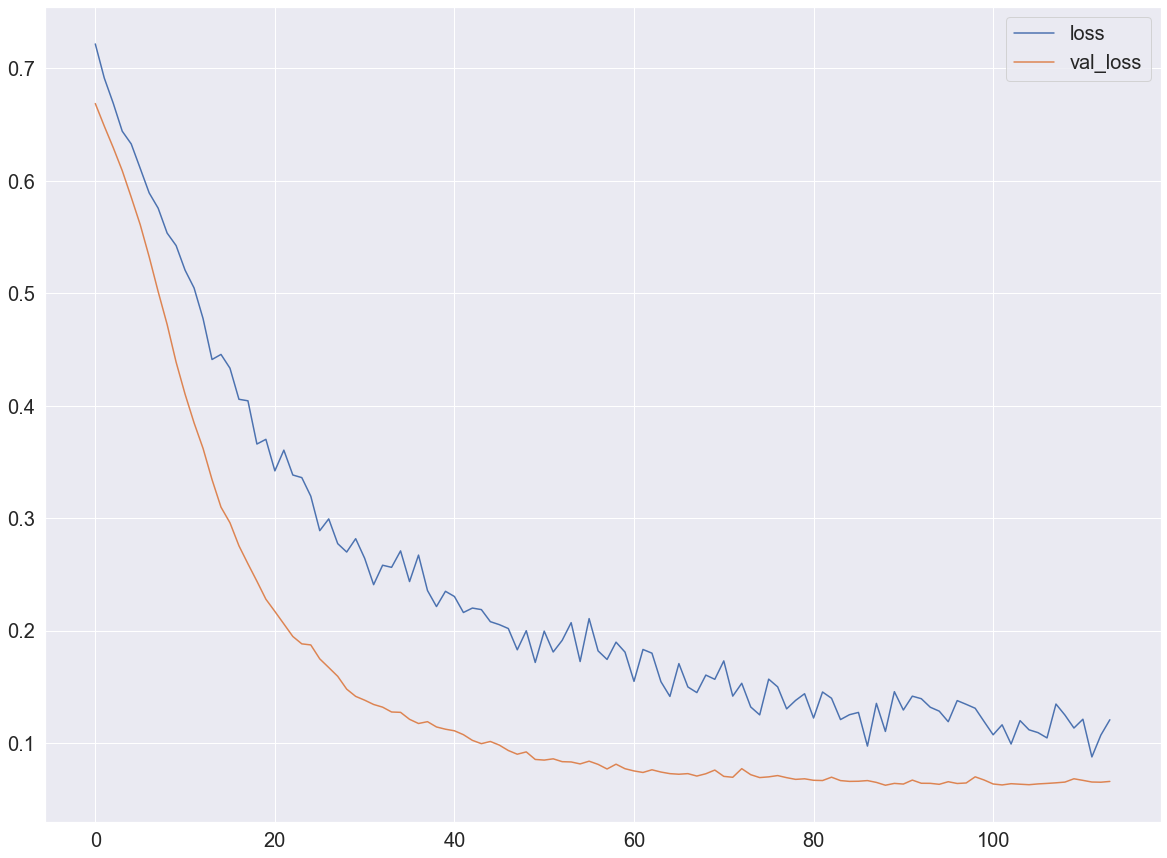

In [31]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(figsize = [20,15])
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 20)

# Make Predictions on the test set

In [35]:
predictions = model.predict_classes(X_test)

# Evaluate the model

In [36]:
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98        64
           1       0.98      0.99      0.99       107

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171

[[ 62   2]
 [  1 106]]


We only had three misclassified values out of our 171 predictions. We had 1 false negative and 2 false positives. We were ~ 98% accurate. The precision is the measure of correctly predicted positive observations over total number of predicted positive observations (106/108) ~ 98%. The recall is the "true positive rate", or when it is actually yes how often does it predict yes (106/107) ~ 99%. The F1 score is the harmonic mean between precision and recall. Therefore, many times, it is a better indicator of model success than just accuracy alone. In this case the f1-score and the accuracy (really all the metrics) are similar and indicates a strong model. Althought this is a very small dataset and we should be wary of generalization to data that it has not seen. Preferably the test sets would have been divided even further into a validation set. Models should be trained on a validation set and only after training would we evaluate on the test set. Splitting the data even further into a validation set in this example is difficult because of the size of the dataset. So this limitation should also be taken into account. 